In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Product_Ratings_Dataset.csv")
print(data)

           UserId    ProductId  Rating   Timestamp
0       User44084  Product8646       3  1513224892
1       User32096  Product2879       3  1396046321
2       User48182  Product2150       3  1430840372
3       User48214  Product4226       4  1264279238
4       User27633  Product5750       3  1530777749
...           ...          ...     ...         ...
100071  User28844  Product7689       5  1528133693
100072  User24768  Product6914       5  1627781180
100073   User9547  Product2205       3  1501029965
100074  User47066  Product4386       2  1311893418
100075  User26984  Product3638       4  1274091928

[100076 rows x 4 columns]


In [5]:
data.tail()

,UserId,ProductId,Rating,Timestamp
100071,User28844,Product7689,5,1528133693
100072,User24768,Product6914,5,1627781180
100073,User9547,Product2205,3,1501029965
100074,User47066,Product4386,2,1311893418
100075,User26984,Product3638,4,1274091928


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100076 entries, 0 to 100075
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserId     100076 non-null  object
 1   ProductId  100076 non-null  object
 2   Rating     100076 non-null  int64 
 3   Timestamp  100076 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [9]:
data

,UserId,ProductId,Rating,Timestamp
0,User44084,Product8646,3,1513224892
1,User32096,Product2879,3,1396046321
2,User48182,Product2150,3,1430840372
3,User48214,Product4226,4,1264279238
4,User27633,Product5750,3,1530777749
...,...,...,...,...
100071,User28844,Product7689,5,1528133693
100072,User24768,Product6914,5,1627781180
100073,User9547,Product2205,3,1501029965
100074,User47066,Product4386,2,1311893418


In [11]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(100076, 4)


In [13]:
data.shape

(100076, 4)

In [15]:
data.dtypes

UserId       object
ProductId    object
Rating        int64
Timestamp     int64
dtype: object

In [17]:
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [28]:
data[data.duplicated]

,UserId,ProductId,Rating,Timestamp


In [19]:
data[data.duplicated(keep = False)]

,UserId,ProductId,Rating,Timestamp


<Axes: >

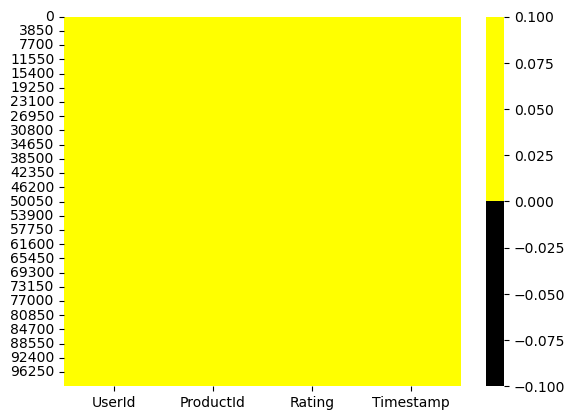

In [26]:
#Visualize data1 missing values using graph
cols = data.columns
colours = ['Black', 'Yellow']
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

# Observations:
- There are no null values in the dataset.
- There are no duplicate values in the dataset.

In [22]:
median_Rating = data["Rating"].median()
mean_Rating = data["Rating"].mean()
print("Median of Rating: ", median_Rating)
print("Mean of Rating: ", mean_Rating)

Median of Rating:  3.0
Mean of Rating:  2.9975618529917263


In [30]:
median_timestamp = data["Timestamp"].median()
mean_timestamp = data["Timestamp"].mean()
print("Median of Timestamp: ", median_timestamp)
print("Mean of Timestamp: ", mean_timestamp)

Median of Timestamp:  1467458944.0
Mean of Timestamp:  1467586188.0292277


In [32]:
#Find the mode values of categorical column (Rating)
print(data["Rating"].value_counts())
mode_rating = data["Rating"].mode()[0]
print(mode_rating)

Rating
2    20193
4    20059
1    19981
5    19926
3    19917
Name: count, dtype: int64
2


In [34]:
data.reset_index(drop = True)

,UserId,ProductId,Rating,Timestamp
0,User44084,Product8646,3,1513224892
1,User32096,Product2879,3,1396046321
2,User48182,Product2150,3,1430840372
3,User48214,Product4226,4,1264279238
4,User27633,Product5750,3,1530777749
...,...,...,...,...
100071,User28844,Product7689,5,1528133693
100072,User24768,Product6914,5,1627781180
100073,User9547,Product2205,3,1501029965
100074,User47066,Product4386,2,1311893418


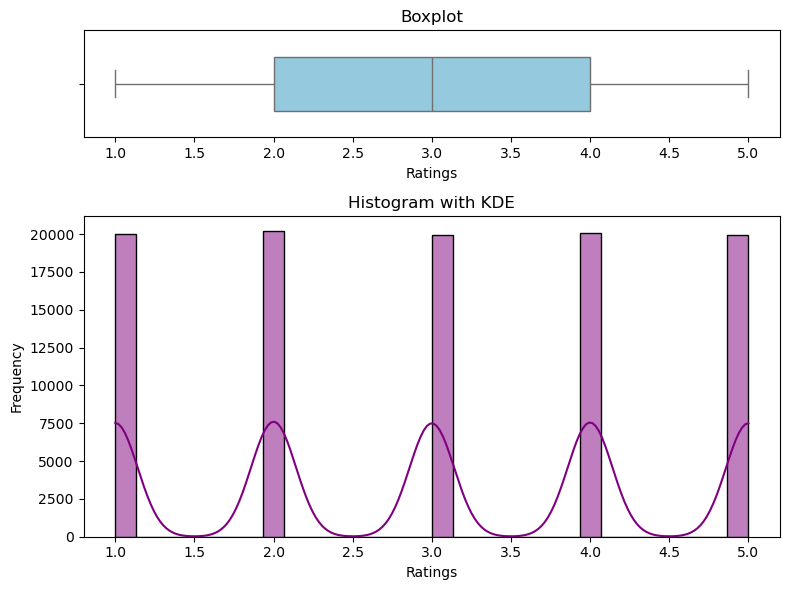

In [36]:
#Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2,1, figsize=(8,6), gridspec_kw={'height_ratios' : [1,3]})

#Plot the boxplot in the first (top) subplot
sns.boxplot(data=data["Rating"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ratings")

#Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data["Rating"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ratings")
axes[1].set_ylabel("Frequency")

#Adjust layout for better spacing
plt.tight_layout()

#Show the plot
plt.show()